In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
from matplotlib import animation

## The Equations
Euler's equations are
$$\lambda_1\dot{\omega_1} -(\lambda_2 - \lambda_3)\omega_2\omega_3 = \Tau_1$$
$$\lambda_2\dot{\omega_2} -(\lambda_3 - \lambda_1)\omega_3\omega_1 = \Tau_2$$
$$\lambda_3\dot{\omega_3} -(\lambda_1 - \lambda_2)\omega_1\omega_2 = \Tau_3$$
In case the torque is zero, we get:
$$\lambda_1\dot{\omega_1} =(\lambda_2 - \lambda_3)\omega_2\omega_3$$
$$\lambda_2\dot{\omega_2} =(\lambda_3 - \lambda_1)\omega_3\omega_1$$
$$\lambda_3\dot{\omega_3} =(\lambda_1 - \lambda_2)\omega_1\omega_2$$
Fisrt, we'll convert it into a form that is managable by python.

In [2]:
#The Differential Equation
def vector_field(w, t, p):
    omega1, omega2, omega3 = w
    lambda1, lambda2, lambda3 = p
    f = [(lambda2-lambda3)*omega3*omega2/lambda1,
    (lambda3-lambda1)*omega3*omega1/lambda2,
    (lambda1-lambda2)*omega2*omega1/lambda3]
    return f

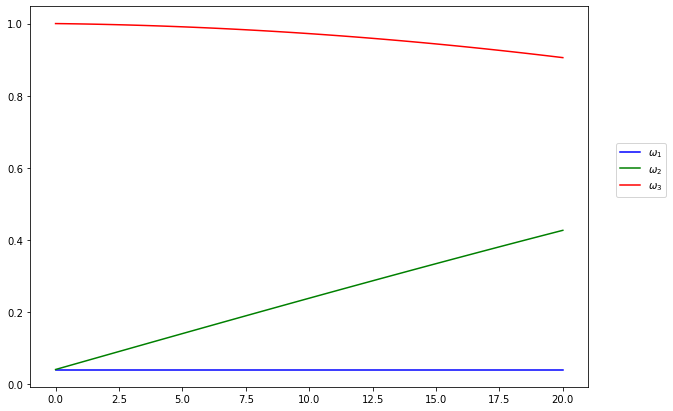

In [6]:
from scipy.integrate import odeint
p = [1, 2, 2]
w0 = [0.04, 0.04, 1]
t = np.linspace(0, 20, 100)
# Call the ODE solver.
wsol = odeint(vector_field, w0, t, args=(p,))
plt.figure(figsize=(10, 7))
plt.plot(t, wsol[:, 0], 'b-', label='$\omega_1$')
plt.plot(t, wsol[:, 1], 'g-', label='$\omega_2$')
plt.plot(t, wsol[:, 2], 'r-', label='$\omega_3$')

plt.legend(loc=[1.05, 0.5])


In [7]:
#A function which solves then plots the given DE
from scipy.integrate import odeint
def solve_and_plot(lambda1=1, lambda2=2, lambda3=2, omega1_0=0.04, omega2_0=0.04, omega3_0=1, extras=False):
    """
    Needs values of lambdas and initial values of omega
    if 'extra' == True, then it will plot the Kinetic energy and the Angular Momentum
    """
    p = [lambda1, lambda2, lambda3]
    w0 = [omega1_0, omega2_0, omega3_0]
    t = np.linspace(0, 20, 100)
    # Call the ODE solver.
    wsol = odeint(vector_field, w0, t, args=(p,))

     # Plot the solution.
    plt.figure(figsize=(10, 7))
    plt.plot(t, wsol[:, 0], 'b-', label='$\omega_1$')
    plt.plot(t, wsol[:, 1], 'g-', label='$\omega_2$')
    plt.plot(t, wsol[:, 2], 'r-', label='$\omega_3$')

    plt.legend(loc=[1.05, 0.5])
    if extras:
        #Kinetic energy and Angular momentum
        omega1 = wsol[:, 0]
        omega2 = wsol[:, 1]
        omega3 = wsol[:, 2]
        T = 0.5*(lambda1*omega1**2+lambda2*omega2**2+lambda3*omega3**2)
        L = ((lambda1*omega1)**2+(lambda2*omega2)**2+(lambda3*omega3)**2)**0.5
        plt.plot(t, T, 'k-', label='Kinetic Energy')
        plt.plot(t, L, 'm-', label='Angular Momentum')
        
    plt.show()

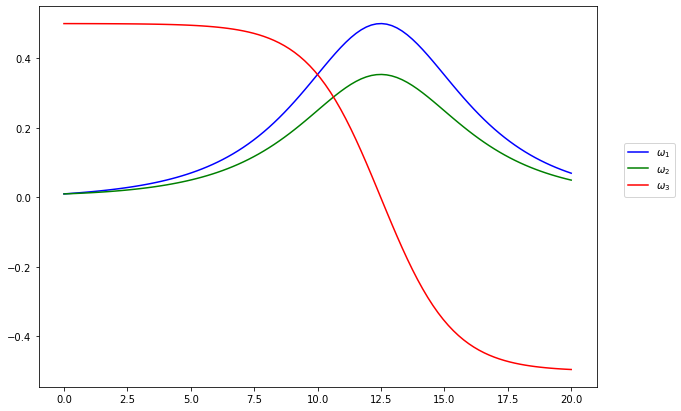

In [8]:
#Plotting a sample solution
solve_and_plot(1,4,3,0.01,0.01,0.5)

### For same values of $\lambda_1$, $\lambda_2$, we see that $\omega_1, \omega_2$ varies sinusoidally. While $\omega_3$ is a constant.

In [9]:
#An Interactive plot
w = interactive(solve_and_plot, lambda1=(1, 10, 0.5), lambda2=(1, 10, 0.5), lambda3=(1, 10, 0.5), omega1_0=(-1, 1, 0.01), omega2_0=(-1, 1, 0.01), omega3_0=(-10, 10, 0.1))
display(w)

interactive(children=(FloatSlider(value=1.0, description='lambda1', max=10.0, min=1.0, step=0.5), FloatSlider(…

## Making Animation
All others values are fixed and $\lambda_3$ is varied.

No handles with labels found to put in legend.


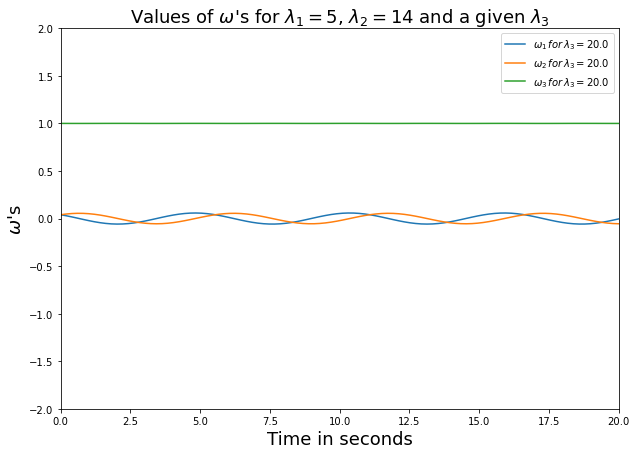

In [114]:
#Creating the Figure and Axes
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(xlim=(0, 20), ylim=(-2, 2))

#Setting title and axes names
plt.title("Values of $\omega$'s for $\lambda_1 = 5$, $\lambda_2 = 14$ and a given $\lambda_3$",
fontdict={'fontsize': 18})
plt.xlabel('Time in seconds', fontdict={'fontsize': 18})
plt.ylabel("$\omega$'s", fontdict={'fontsize': 18})

#Lines which are neede to animate
N = 3
lines = [plt.plot([], [])[0] for _ in range(N)]

#The init function
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines

#Needed for adding legends
legend = plt.legend()

#The Animate function
def animate(i):
    lambda1 = 5
    lambda2 = 14
    p = [lambda1, lambda2, i]
    w0 = [0.04, 0.04, 1]
    t = np.linspace(0, 20, 100)

    # Call the ODE solver.
    wsol = odeint(vector_field, w0, t, args=(p,))

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(t, wsol[:, j])
        line.set_label(f'$\omega_{j+1} \, for \,\lambda_3 = {np.round(i,1)}$')
    legend = plt.legend(loc='upper right')
    return lines + [legend]

#The animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.linspace(1, 20, 10), interval=20, blit=True)

#Saving the Animation
anim.save('omegas_final.mp4', writer='ffmpeg', dpi=200)

### To see the effect of initial value of $\omega_3$ the functions below makes animation for different values of $\omega_3$.

In [16]:
def make_movies(omegas):
    """
    The function varies the value of omega3 and makes movies for each value.
    It can be easily modified for some other omega values.
    """
    for omega3 in omegas:
        fig = plt.figure(figsize=(10, 7))
        
        if -2<omega3<2:
            ax = plt.axes(xlim=(0, 20), ylim=(-2, 2))
        else:
            ax = plt.axes(xlim=(0, 20), ylim=(-omega3-0.3, omega3+0.3))
        plt.title("Values of $\omega$'s for $\lambda_1 = 5$, $\lambda_2 = 14$ and a given $\lambda_3$",
        fontdict={'fontsize': 18})
        plt.xlabel('Time in seconds', fontdict={'fontsize': 18})
        plt.ylabel("$\omega$'s", fontdict={'fontsize': 18})
        N = 3
        lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

        def init():
            #init lines
            for line in lines:
                line.set_data([], [])
            return lines

        legend = plt.legend()
        def animate(i):
            lambda1 = 5
            lambda2 = 14
            p = [lambda1, lambda2, i]
            w0 = [0.04, 0.04, omega3]
            t = np.linspace(0, 20, 100)
            # Call the ODE solver.
            wsol = odeint(vector_field, w0, t, args=(p,))
            # Plot the solution.
            for j, line in enumerate(lines):
                line.set_data(t, wsol[:, j])
                line.set_label(f'$\omega_{j+1} \, for \,\lambda_3 = {np.round(i,1)}$')
            legend = plt.legend(loc='upper right')
            return lines + [legend]
        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=np.linspace(1, 20, 100), interval=200, blit=True)

        anim.save(f'omegas_for_initial_omega3_{omega3}.mp4', writer='ffmpeg', dpi=200)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


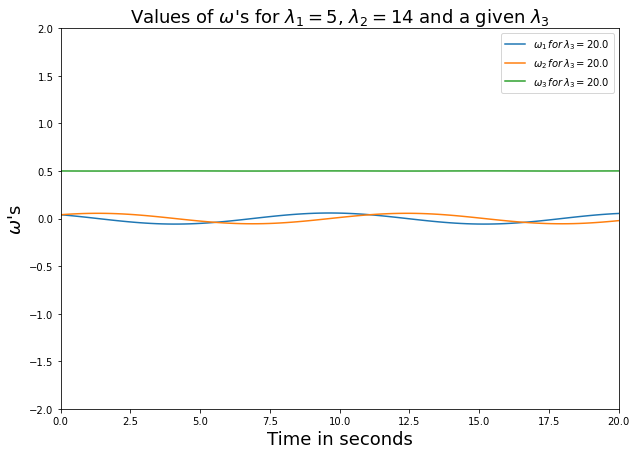

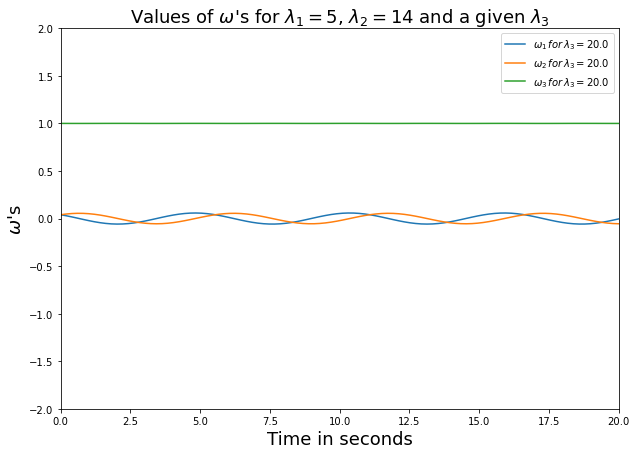

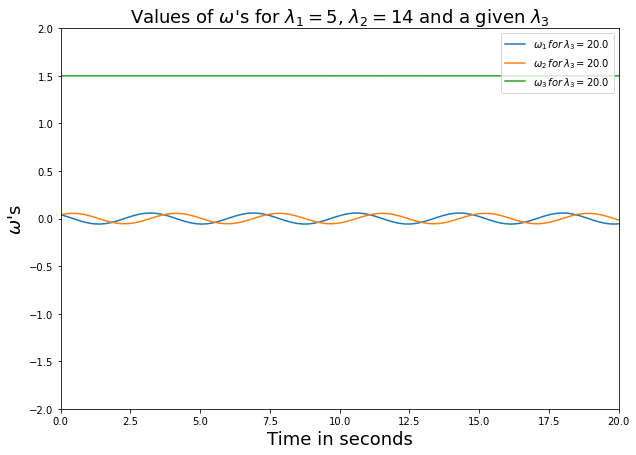

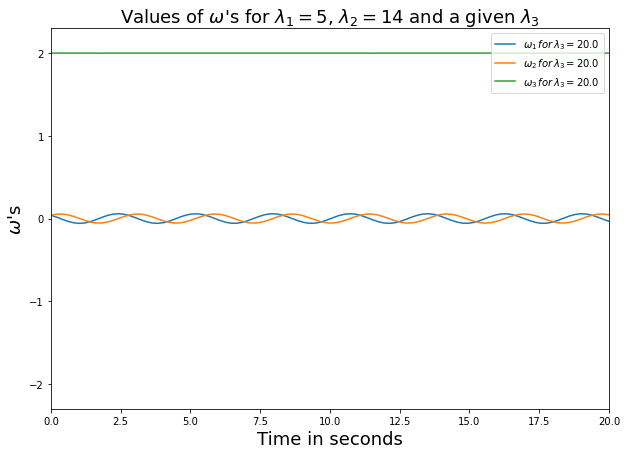

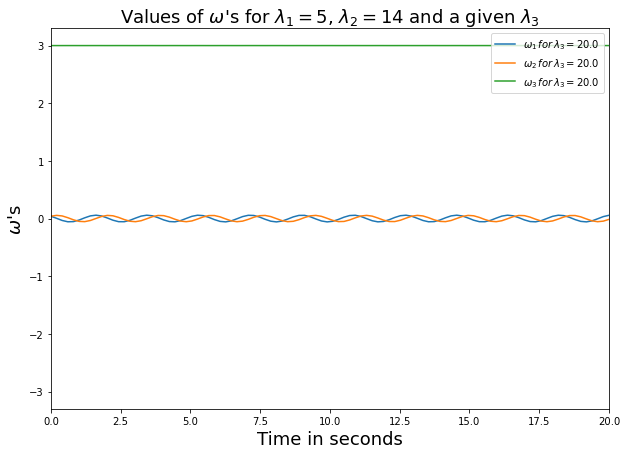

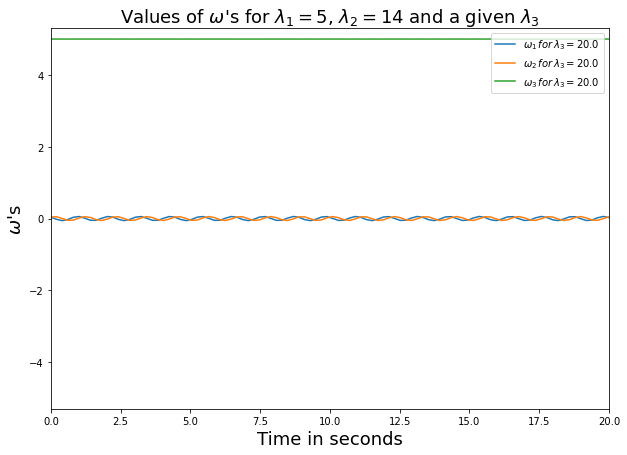

In [17]:
make_movies([0.5,1,1.5,2,3,5])